# Data process

- 데이터 읽고, shape 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

train_data = pd.read_csv("./data/kdd99_train.csv")
test_data = pd.read_csv("./data/kdd99_test.csv")
print(train_data.shape)
print(test_data.shape)


(395216, 42)
(98804, 42)


### train과 test에서 각각 공격 타입 횟수 결과 확인

In [2]:
print(train_data["Attack Type"].value_counts())
print(test_data["Attack Type"].value_counts())

Attack Type
dos       313104
normal     77911
probe       3273
r2l          891
u2r           37
Name: count, dtype: int64
Attack Type
dos       78354
normal    19366
probe       834
r2l         235
u2r          15
Name: count, dtype: int64


### train_data와 test데이터의 결측치 있는 샘플 확인

    - any(axis = 1) : 행 기준 True 하나라도 있으면 true.
    - df.isnull() : 각 요소마다 nan이면 true

In [3]:
print(train_data[train_data.isnull().any(axis = 1)])
print(test_data[test_data.isnull().any(axis = 1)])

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, lnum_compromised, lroot_shell, lsu_attempted, lnum_root, lnum_file_creations, lnum_shells, lnum_access_files, lnum_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, Attack Type]
Index: []

[0 rows x 42 columns]
Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, lnum_compromised, lroot_shell, lsu_attempted, lnum_root, lnum_file_creations, lnum_shells, lnum_access_files, lnum_outbou

### 데이터 형식 문제 제거 (one_hot_encoding vs label encoding)

In [4]:
num_cols = train_data._get_numeric_data().columns
cate_cols = list(set(train_data.columns) - set(num_cols))
cate_cols.remove('Attack Type')
cate_cols

['protocol_type', 'service', 'flag']

## (1) label encoding

In [5]:
train_data_l = train_data.copy()
test_data_l = test_data.copy()

train_data_l["protocol_type"].unique()
fmap_p = {'tcp': 0, 'icmp': 1,'udp': 2}
train_data_l["protocol_type"] = train_data_l["protocol_type"].map(fmap_p)
train_data_l["protocol_type"]

test_data_l["protocol_type"].unique()
fmap_p = {'tcp': 0, 'icmp': 1,'udp': 2}
test_data_l["protocol_type"] = test_data_l["protocol_type"].map(fmap_p)
test_data_l["protocol_type"]


0        1
1        1
2        0
3        0
4        0
        ..
98799    1
98800    0
98801    0
98802    0
98803    1
Name: protocol_type, Length: 98804, dtype: int64

In [6]:
train_data_l["flag"].unique()
fmap_f = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'S1':4, 'RSTO':5, 'SH':6, 'S2':7, 'S3':8,
       'RSTOS0':9, 'OTH':10}
train_data_l["flag"] = train_data_l["flag"].map(fmap_f)
train_data_l["flag"]

test_data_l["flag"].unique()
fmap_f = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'S1':4, 'RSTO':5, 'SH':6, 'S2':7, 'S3':8,
       'RSTOS0':9, 'OTH':10}
test_data_l["flag"] = test_data_l["flag"].map(fmap_f)
test_data_l["flag"]


0        0
1        0
2        1
3        0
4        1
        ..
98799    0
98800    1
98801    0
98802    0
98803    0
Name: flag, Length: 98804, dtype: int64

In [7]:
train_data_l["service"].unique()
fmap_s = {}
for i , v in enumerate(train_data_l["service"].unique()):
    fmap_s[v] = i

train_data_l["service"] = train_data_l["service"].map(fmap_s)
train_data_l["service"]

test_data_l["service"].unique()
fmap_s = {}
for i , v in enumerate(test_data_l["service"].unique()):
    fmap_s[v] = i

test_data_l["service"] = test_data_l["service"].map(fmap_s)
test_data_l["service"]




0        0
1        0
2        1
3        2
4        1
        ..
98799    0
98800    1
98801    2
98802    2
98803    0
Name: service, Length: 98804, dtype: int64

## (2)(one - hot encoding)

위에서 찾은 문자열 데이터 수치형으로 변환

In [8]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,tcp,http,SF,316,343,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.0,0.0,0.0,0.0,normal
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,dos
2,0,tcp,private,S0,0,0,0,0,0,0,...,10,0.04,0.07,0.00,0.00,1.0,1.0,0.0,0.0,dos
3,0,tcp,private,S0,0,0,0,0,0,0,...,18,0.07,0.05,0.00,0.00,1.0,1.0,0.0,0.0,dos
4,0,tcp,private,REJ,0,0,0,0,0,0,...,4,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395211,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,dos
395212,0,tcp,private,S0,0,0,0,0,0,0,...,8,0.03,0.06,0.00,0.00,1.0,1.0,0.0,0.0,dos
395213,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,dos
395214,9141,udp,other,SF,147,105,0,0,0,0,...,3,0.01,0.41,0.84,0.00,0.0,0.0,0.0,0.0,normal


In [9]:
train_data_one_hot = train_data.copy()
test_data_one_hot = test_data.copy()

train_data_one_hot = pd.get_dummies(train_data, columns = ['protocol_type','service', 'flag'], dtype = int)
test_data_one_hot = pd.get_dummies(test_data, columns = ['protocol_type','service', 'flag'], dtype = int)
print(train_data_one_hot.shape)

(395216, 118)


컬럼별로 문자열로 되어있는 index 존재하는지 최종확인

(attack type과 feature의 숫자 변환 성공 확인)

In [10]:
string_cols = train_data_l.select_dtypes(include = "object").columns
string_cols2 = test_data_l.select_dtypes(include = "object").columns
string_cols = train_data_one_hot.select_dtypes(include = "object").columns
string_cols2 = test_data_one_hot.select_dtypes(include = "object").columns
print((string_cols, string_cols2))

(Index(['Attack Type'], dtype='object'), Index(['Attack Type'], dtype='object'))


(3) 데이터 중복 제거 & 결측치 제거

reset_index를 통해 다시 0 부터 정렬

(중복 확인은 df[df.duplicated()], df.duplicated는 중복된 열 반환) 

In [11]:
train_data_l = train_data_l.dropna().drop_duplicates().reset_index(drop=True)
test_data_l = test_data_l.dropna().drop_duplicates().reset_index(drop=True)
train_data_one_hot = train_data_one_hot.dropna().drop_duplicates().reset_index(drop=True)
test_data_one_hot = test_data_one_hot.dropna().drop_duplicates().reset_index(drop=True)
print(train_data_l.shape, test_data_l.shape, train_data_one_hot.shape, test_data_one_hot.shape)

(120174, 42) (35371, 42) (120174, 118) (35371, 116)


### 정답데이터와 feature 행렬 구분 및 정답 데이터 형식 변환

In [12]:
train_data_l["Attack Type"] = (train_data_l["Attack Type"] == 'normal').astype(int)
test_data_l["Attack Type"] = (test_data_l["Attack Type"] == 'normal').astype(int)
print(train_data_l["Attack Type"])
print(test_data_l["Attack Type"])

train_data_one_hot["Attack Type"] = (train_data_one_hot["Attack Type"] == 'normal').astype(int)
test_data_one_hot["Attack Type"] = (test_data_one_hot["Attack Type"] == 'normal').astype(int)
print(train_data_one_hot["Attack Type"])
print(test_data_one_hot["Attack Type"])

0         1
1         0
2         0
3         0
4         0
         ..
120169    1
120170    1
120171    1
120172    1
120173    1
Name: Attack Type, Length: 120174, dtype: int64
0        0
1        0
2        1
3        0
4        0
        ..
35366    1
35367    1
35368    0
35369    1
35370    1
Name: Attack Type, Length: 35371, dtype: int64
0         1
1         0
2         0
3         0
4         0
         ..
120169    1
120170    1
120171    1
120172    1
120173    1
Name: Attack Type, Length: 120174, dtype: int64
0        0
1        0
2        1
3        0
4        0
        ..
35366    1
35367    1
35368    0
35369    1
35370    1
Name: Attack Type, Length: 35371, dtype: int64


In [13]:
x_train_l = train_data_l.drop(columns = ["Attack Type"])
y_train_l = train_data_l['Attack Type']
x_test_l = test_data_l.drop(columns = ["Attack Type"])
y_test_l = test_data_l["Attack Type"]
x_train_one_hot = train_data_one_hot.drop(columns = ["Attack Type"])
y_train_one_hot = train_data_one_hot['Attack Type']
x_test_one_hot = test_data_one_hot.drop(columns = ["Attack Type"])
y_test_one_hot = test_data_one_hot["Attack Type"]
print("label encoding shape:\n","x_train: ", x_train_l.shape, "\ny_train: " , y_train_l.shape, "\nx_test: ", x_test_l.shape, "\ny_test: " ,y_test_l.shape)
print("\n\none_hot encoding shape:\n" , "x_train: ",x_train_one_hot.shape, "\ny_train: " ,y_train_one_hot.shape, "\nx_test: ", x_test_one_hot.shape, "\ny_test: " , y_test_one_hot.shape)

label encoding shape:
 x_train:  (120174, 41) 
y_train:  (120174,) 
x_test:  (35371, 41) 
y_test:  (35371,)


one_hot encoding shape:
 x_train:  (120174, 117) 
y_train:  (120174,) 
x_test:  (35371, 115) 
y_test:  (35371,)


(+)one_hot_encoding 크기 조절

x_train과 x_test의 크기가 맞아야 연산 가능하기때문에 크기 맞춰주기.

df.align() - 두 df에 대해 열 순서 갯수를 맞춰주는 역할.

In [14]:
x_train_one_hot, x_test_one_hot = x_train_one_hot.align(x_test_one_hot, join='outer', axis=1, fill_value=0)
print(x_train_one_hot.shape, x_test_one_hot.shape)

(120174, 118) (35371, 118)


## pearson(x, y)

중복데이터를 제거하기위해 의미없는 특징(값이 모두 같은) 제거후 상관계수 계산 및 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

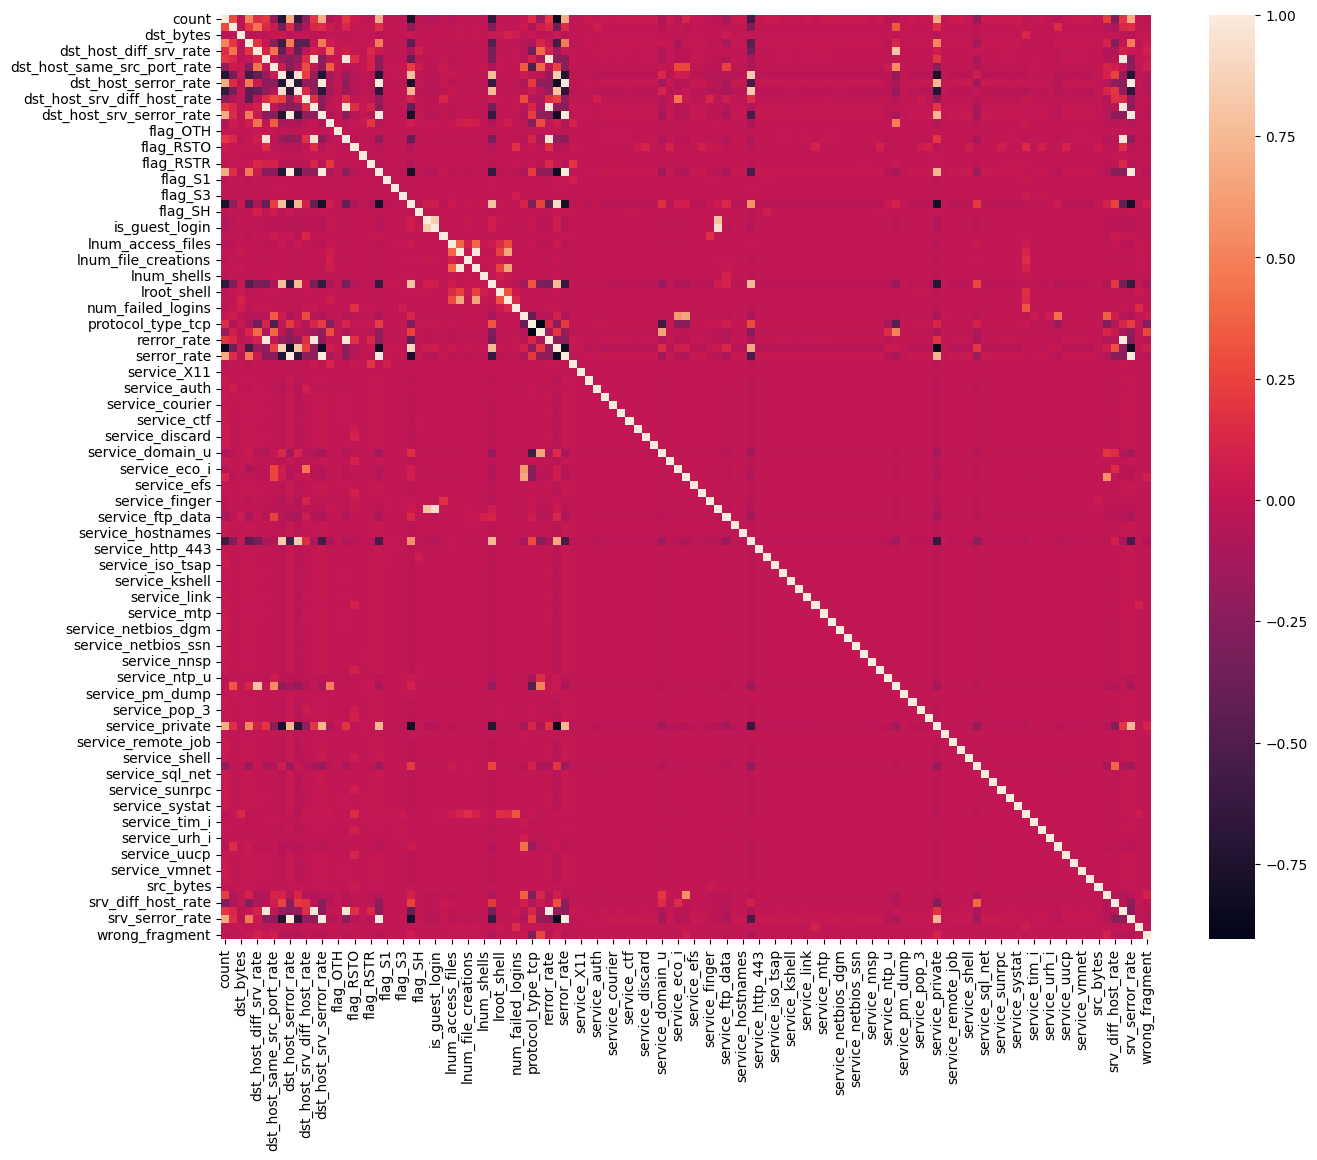

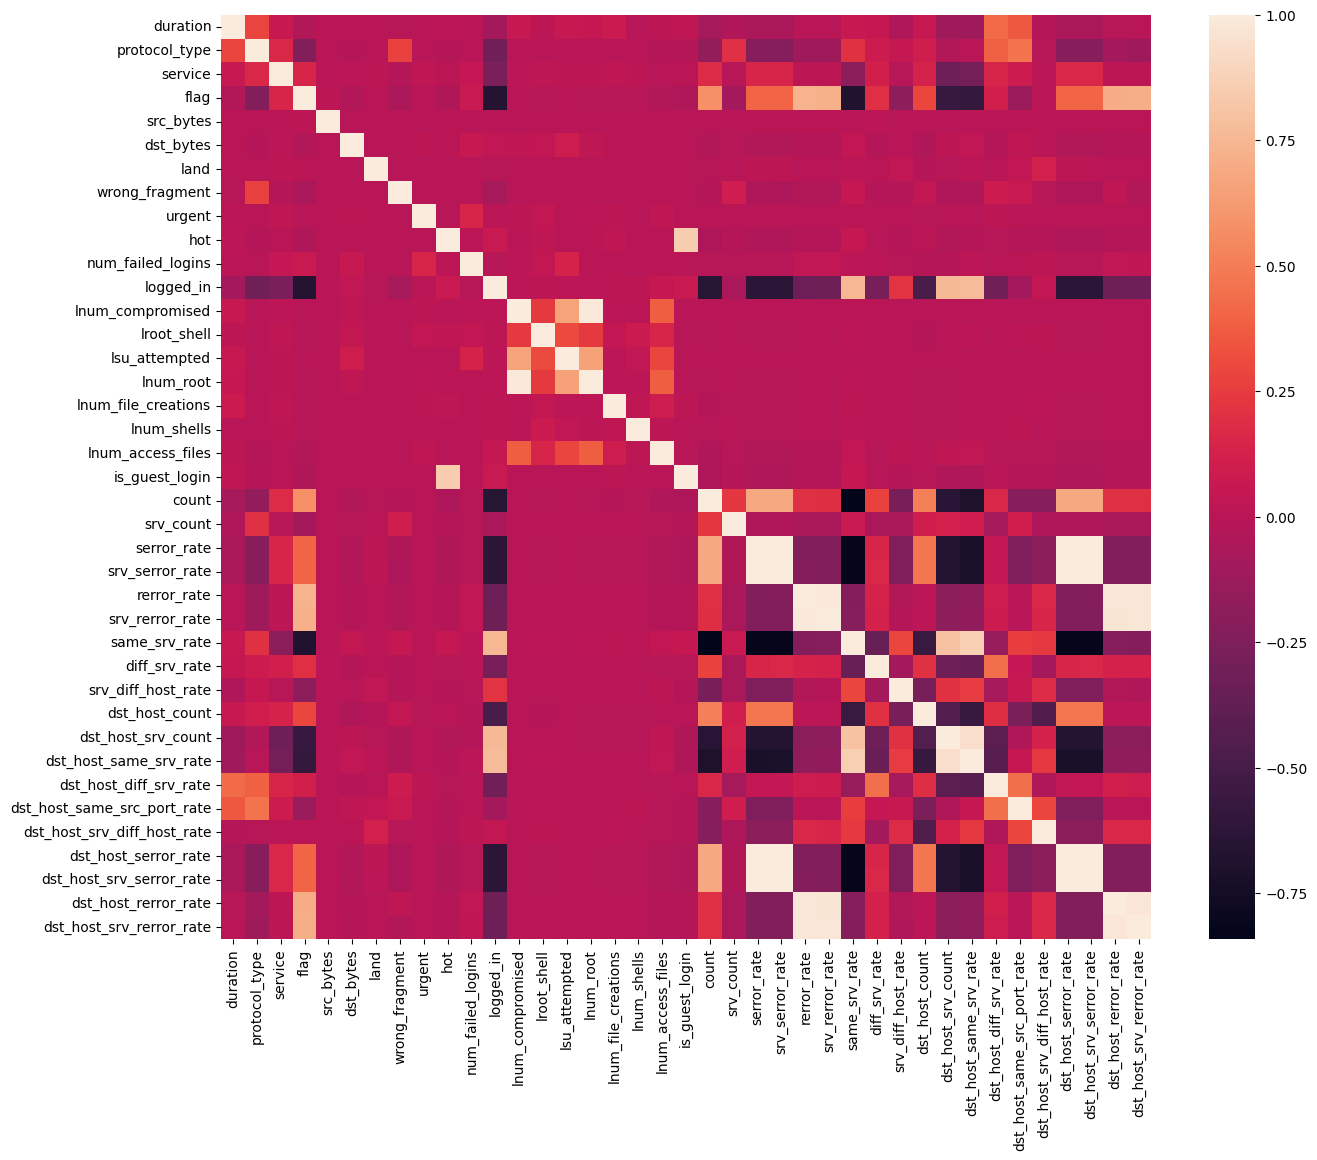

In [15]:
x_train_one_hot = x_train_one_hot.loc[:, x_train_one_hot.nunique() > 1]
x_test_one_hot = x_test_one_hot[x_train_one_hot.columns]
corr_one_hot = x_train_one_hot.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr_one_hot)
plt.show

x_train_l = x_train_l.loc[:, x_train_l.nunique() > 1]
x_test_l = x_test_l[x_train_l.columns]
corr = x_train_l.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr)
plt.show

In [16]:
from mycode import *

data = Data()
drop_one_hot = data.pearson(x_train_one_hot)
drop_l = data.pearson(x_train_l)
print(drop_one_hot.shape, drop_l.shape) 

remove feature:  {'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'lnum_compromised', 'flag_REJ', 'srv_rerror_rate', 'dst_host_rerror_rate', 'protocol_type_udp', 'srv_serror_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_same_srv_rate', 'serror_rate', 'same_srv_rate'}
13
remove feature:  {'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'lnum_compromised', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate', 'serror_rate'}
8
(120174, 102) (120174, 31)


# 분석기 평가 및 비교

## Naive Baysian

### (1)self made baysian

- condition_p(): Train data 통해 예측에 활용할 클래스별 통계적 특징 추출(class = {0, 1})

- predict(): train data에서 추출한 통계적 특징을 통해 가우시안 베이즈로 분류

In [17]:
from mycode import *

bays = baysian()
mean_y1, std_y1, mean_y0 , std_y0 = bays.condition_p(x_train_one_hot, y_train_one_hot)
y_hat_one_hot = bays.predict(x_train_one_hot, y_train_one_hot, x_test_one_hot)
print(y_hat_one_hot.shape)
print(y_hat_one_hot)

mean_y1_l, std_y1_l, mean_y0_l , std_y0_l = bays.condition_p(x_train_l, y_train_l)
y_hat_l = bays.predict(x_train_l, y_train_l, x_test_l)
print(y_hat_l.shape)
print(y_hat_l)

(35371,)
[1 1 1 ... 1 1 1]
(35371,)
[1 0 1 ... 0 1 1]


In [18]:
evaluate = eval()
acc, prec, rec, f1 = evaluate.metrics_np(y_test_one_hot, y_hat_one_hot)
acc_l, prec_l, rec_l, f1_l = evaluate.metrics_np(y_test_l, y_hat_l)
print("label encoding evaluate:\n", "Accurate: ", acc_l,"\nPrecison: " , prec_l,"\nrecall: ", rec_l,"\nf1_score: ", f1_l)
print("\n\none_hot encoding evaluate:\n", "Accurate: ", acc,"\nPrecison: " , prec,"\nrecall: ", rec,"\nf1_score: ", f1)



label encoding evaluate:
 Accurate:  0.9658760001130842 
Precison:  0.939606376901901 
recall:  0.9975741537104368 
f1_score:  0.967722957564694


one_hot encoding evaluate:
 Accurate:  0.5127929659890856 
Precison:  0.5127929659890856 
recall:  0.9999999999999946 
f1_score:  0.6779420283989968


### value

o_h : one_hot encoding data

l : label encoding data

Text(0.5, 1.0, 'Comparison (Red : one_hot encoding, blue : label encoding)')

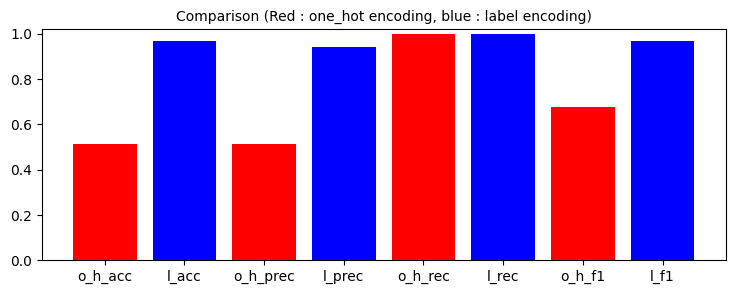

In [19]:
names = ['o_h_acc','l_acc','o_h_prec','l_prec','o_h_rec','l_rec','o_h_f1','l_f1']
val = [acc,acc_l, prec,prec_l, rec,rec_l, f1,f1_l]
color_map = ['r', 'b', 'r', 'b', 'r', 'b','r', 'b']
plt.figure(figsize = (30,3))
plt.subplot(131)
plt.ylim(0, 1.02)
plt.bar(names, val, color = color_map)
plt.title("Comparison (Red : one_hot encoding, blue : label encoding)", fontsize = 10)


## (2) sklearn naive_bayes

- one_hot encoding data predict

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_b_o_h = GaussianNB()

start_time = time.time()

model_b_o_h.fit(x_train_one_hot, y_train_one_hot)
end_time = time.time()
print("Train time: ", end_time - start_time)

start_time = time.time()
y_one_hot_pred_sklearn = model_b_o_h.predict(x_test_one_hot)
end_time = time.time()
print("Test time: ", end_time - start_time)

acc_s_b_o_h, prec_s_b_o_h, rec_s_b_o_h, f1_s_b_o_h = evaluate.metrics_np(y_test_one_hot, y_one_hot_pred_sklearn)
print("Accurate: " ,acc_s_b_o_h, "\nPrecision: ", prec_s_b_o_h, "\nRecall: ",rec_s_b_o_h,"\nF1_score: " ,f1_s_b_o_h)

one_hot_score_train_nb = model_b_o_h.score(x_train_one_hot, y_train_one_hot)
one_hot_score_test_nb = model_b_o_h.score(x_test_one_hot, y_test_one_hot)
print("Training score : ", one_hot_score_train_nb)
print("Testing score : ", one_hot_score_test_nb)

Train time:  0.06842899322509766
Test time:  0.017266035079956055
Accurate:  0.7687371010149535 
Precision:  0.6898787277858262 
Recall:  0.9973536222295679 
F1_score:  0.8155996392663548
Training score :  0.7934744620300564
Testing score :  0.7687371010149557


- label encoding predict

In [21]:
model_b_l = GaussianNB()

start_time = time.time()

model_b_l.fit(x_train_l, y_train_l)
end_time = time.time()
print("Train time: ", end_time - start_time)

start_time = time.time()
y_l_sklearn = model_b_l.predict(x_test_l)
end_time = time.time()
print("Test time: ", end_time - start_time)

acc_s_b_l, prec_s_b_l, rec_s_b_l, f1_s_b_l = evaluate.metrics_np(y_test_l, y_l_sklearn)
print("Accurate: " ,acc_s_b_l, "\nPrecision: ", prec_s_b_l, "\nRecall: ",rec_s_b_l,"\nF1_score: " ,f1_s_b_l)

print("Training score : ", model_b_l.score(x_train_l, y_train_l))
print("Testing score : ", model_b_l.score(x_test_l, y_test_l))

Train time:  0.029163837432861328
Test time:  0.005106925964355469
Accurate:  0.7685957422747426 
Precision:  0.6897472070766741 
Recall:  0.9973536222295679 
F1_score:  0.8155077200012474
Training score :  0.7933662855526153
Testing score :  0.7685957422747448


Text(0.5, 1.0, 'Comparison (Red : one_hot encoding, blue : label encoding)')

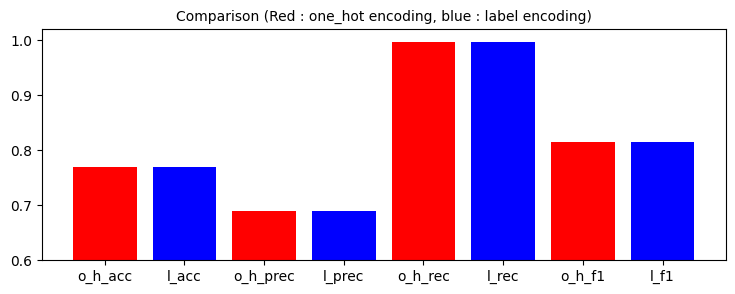

In [39]:
names = ['o_h_acc','l_acc','o_h_prec','l_prec','o_h_rec','l_rec','o_h_f1','l_f1']
val = [acc_s_b_o_h,acc_s_b_l, prec_s_b_o_h,prec_s_b_l, rec_s_b_o_h,rec_s_b_l, f1_s_b_o_h,f1_s_b_l]
color_map = ['r', 'b', 'r', 'b', 'r', 'b','r', 'b']
plt.figure(figsize = (30,3))
plt.subplot(131)
plt.ylim(0.6, 1.02)
plt.bar(names, val, color = color_map)
plt.title("Comparison (Red : one_hot encoding, blue : label encoding)", fontsize = 10)

## (3)DecisionTree

- one_hot encoding predict

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_t = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
start_time = time.time()
model_t.fit(x_train_one_hot, y_train_one_hot)
end_time = time.time()
print("Training time: ", end_time - start_time)

start_time = time.time()
y_hat_one_hot_tree = model_t.predict(x_test_one_hot)
end_time = time.time()
print("Testing time: ", end_time - start_time)

acc_o_h_t, prec_o_h_t, rec_o_h_t, f1_o_h_t = evaluate.metrics_np(y_test_one_hot, y_hat_one_hot_tree)
print("Accurate: " ,acc_o_h_t, "\nPrecision: ", prec_o_h_t, "\nRecall: ",rec_o_h_t,"\nF1_score: " ,f1_o_h_t)

one_hot_score_train_tree = model_t.score(x_train_one_hot, y_train_one_hot)
one_hot_score_test_tree = model_t.score(x_test_one_hot, y_test_one_hot)
print("Training score : ", one_hot_score_train_tree)
print("Testing score : ", one_hot_score_test_tree)

Training time:  0.1698298454284668
Testing time:  0.0066182613372802734
Accurate:  0.9824432444658024 
Precision:  0.9731510993463295 
Recall:  0.9931635240930589 
F1_score:  0.9830554721320514
Training score :  0.9848636144257493
Testing score :  0.9824432444658053


- label encoding predict

In [ ]:
model_t2 = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
start_time = time.time()
model_t2.fit(x_train_l, y_train_l)
end_time = time.time()
print("Training time: ", end_time - start_time)

start_time = time.time()
y_hat_l_tree = model_t2.predict(x_test_l)
end_time = time.time()
print("Testing time: ", end_time - start_time)

acc_l_t, prec_l_t, rec_l_t, f1_l_t = evaluate.metrics_np(y_test_l, y_hat_l_tree)
print("Accurate: " ,acc_l_t, "\nPrecision: ", prec_l_t, "\nRecall: ",rec_l_t,"\nF1_score: " ,f1_l_t)

print("Training score : ", model_t2.score(x_train_l, y_train_l))
print("Testing score : ", model_t2.score(x_test_l, y_test_l))

label_score_train_tree = model_t.score(x_train_l, y_train_l)
label_score_test_tree = model_t.score(x_test_l, y_test_l)
print("Training score : ", label_score_train_tree)
print("Testing score : ", label_score_test_tree)

Training time:  0.11430692672729492
Testing time:  0.002927064895629883
Accurate:  0.9791354499448672 
Precision:  0.9615874363327624 
Recall:  0.9992281398169535 
F1_score:  0.9800465040326392
Training score :  0.9793549353437515
Testing score :  0.9791354499448701


Text(0.5, 1.0, 'Comparison (Red : one_hot encoding, blue : label encoding)')

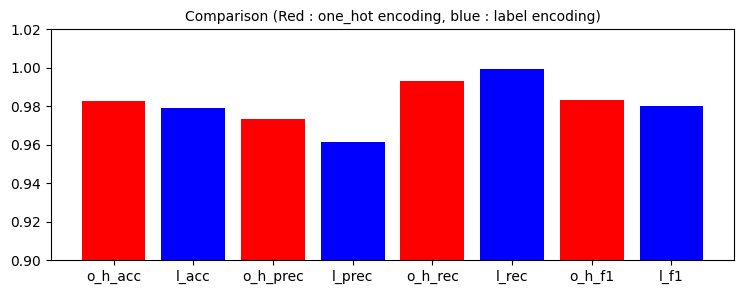

In [38]:
names = ['o_h_acc','l_acc','o_h_prec','l_prec','o_h_rec','l_rec','o_h_f1','l_f1']
val = [acc_o_h_t,acc_l_t, prec_o_h_t,prec_l_t, rec_o_h_t,rec_l_t, f1_o_h_t,f1_l_t]
color_map = ['r', 'b', 'r', 'b', 'r', 'b','r', 'b']
plt.figure(figsize = (30,3))
plt.subplot(131)
plt.ylim(0.9, 1.02)
plt.bar(names, val, color = color_map)
plt.title("Comparison (Red : one_hot encoding, blue : label encoding)", fontsize = 10)

## (3) RandomForest

- one_hot encoding predict

In [24]:
from sklearn.ensemble import RandomForestClassifier

model_f_o_h = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
model_f_o_h.fit(x_train_one_hot, y_train_one_hot)
end_time = time.time()
print("Training time: ", end_time - start_time)

start_time = time.time()
y_hat_o_h_f = model_f_o_h.predict(x_test_one_hot)
end_time = time.time()
print("Testing time: ", end_time - start_time)

acc_f_o_h, prec_f_o_h, rec_f_o_h, f1_f_o_h = evaluate.metrics_np(y_test_one_hot, y_hat_o_h_f)

print("Accurate: " ,acc_f_o_h, "\nPrecision: ", prec_f_o_h, "\nRecall: ",rec_f_o_h,"\nF1_score: " ,f1_f_o_h)
print("Traing score: ", model_f_o_h.score(x_train_one_hot, y_train_one_hot))
print("Testing score: ", model_f_o_h.score(x_test_one_hot, y_test_one_hot))

Training time:  0.9883790016174316
Testing time:  0.029973983764648438
Accurate:  0.9992366628028583 
Precision:  0.998953110364202 
Recall:  0.9995589370382568 
F1_score:  0.9992559318264242
Traing score:  1.0
Testing score:  0.999236662802861


- label encodig predict

In [25]:
model_f_l = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
model_f_l.fit(x_train_l, y_train_l)
end_time = time.time()
print("Training time: ", end_time - start_time)

start_time = time.time()
y_hat_f_l = model_f_l.predict(x_test_l)
end_time = time.time()
print("Testing time: ", end_time - start_time)

acc_f_l, prec_f_l, rec_f_l, f1_f_l = evaluate.metrics_np(y_test_l, y_hat_f_l)

print("Accurate: ", acc_f_l, "\nPrecision: ", prec_f_l, "\nRecall: ", rec_f_l, "\nF1_score: ", f1_f_l)
print("Traing score: ", model_f_l.score(x_train_l, y_train_l))
print("Testing score: ", model_f_l.score(x_test_l, y_test_l))

Training time:  1.0881998538970947
Testing time:  0.022953033447265625
Accurate:  0.9989822170704786 
Precision:  0.9986776859504078 
Recall:  0.999338405557388 
F1_score:  0.9990079364579312
Traing score:  0.9999916787325045
Testing score:  0.9989822170704815


Text(0.5, 1.0, 'Comparison (Red : one_hot encoding, blue : label encoding)')

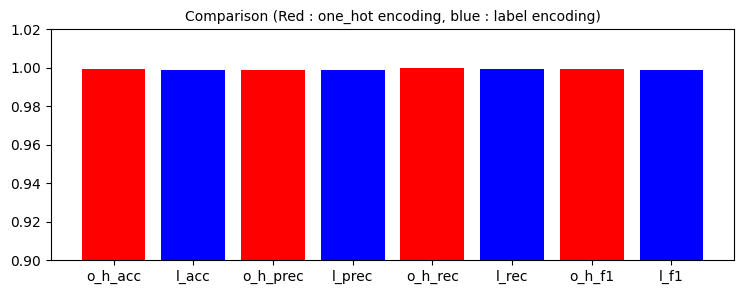

In [35]:
names = ['o_h_acc','l_acc','o_h_prec','l_prec','o_h_rec','l_rec','o_h_f1','l_f1']
val = [acc_f_o_h,acc_f_l, prec_f_o_h,prec_f_l, rec_f_o_h,rec_f_l, f1_f_o_h,f1_f_l]
color_map = ['r', 'b', 'r', 'b', 'r', 'b','r', 'b']
plt.figure(figsize = (30,3))
plt.subplot(131)
plt.ylim(0.9, 1.02)
plt.bar(names, val, color = color_map)
plt.title("Comparison (Red : one_hot encoding, blue : label encoding)", fontsize = 10)